# Train data distribution

In [1]:
import pickle
with open("Notebook_result_1/train_df.pickle", "rb") as file:
    train_df = pickle.load(file)
train_df.head()

,SMILES,rdkit_Mol,SELFIES,LogP,SELFIES_label,SELFIES_one_hot
0,O=C1C=C(c2ccc(F)cc2OCc2ccccc2)CC(c2ccc(Cl)cc2)C1,<rdkit.Chem.rdchem.Mol object at 0x00000252FF6...,[O][=C][C][=C][Branch2][Ring1][=Branch1][C][=C...,6.58820,"[33, 10, 24, 10, 22, 35, 8, 24, 10, 24, 10, 21...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,N=C(O)N1CCCc2cc(-c3cncc(C4CC4)c3)cnc21,<rdkit.Chem.rdchem.Mol object at 0x00000252FF6...,[N][=C][Branch1][C][O][N][C][C][C][C][=C][C][B...,3.26637,"[31, 10, 21, 24, 33, 31, 24, 24, 24, 24, 10, 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,COc1ccc(OC)c(S(=O)(=O)N2CCc3ccccc3C2)c1,<rdkit.Chem.rdchem.Mol object at 0x00000252FF6...,[C][O][C][=C][C][=C][Branch1][Ring1][O][C][C][...,2.45080,"[24, 33, 24, 10, 24, 10, 21, 35, 33, 24, 24, 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,CCN1c2ncc(COc3cc[n+]([O-])cc3)cc2C(=O)N(C)c2cc...,<rdkit.Chem.rdchem.Mol object at 0x00000252FF6...,[C][C][N][C][=N][C][=C][Branch1][=C][C][O][C][...,3.09040,"[24, 24, 31, 24, 13, 24, 10, 21, 10, 24, 33, 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,CC(C)(C#Cc1ccc2c(c1)-c1nc(C(N)=O)cn1CCO2)CO,<rdkit.Chem.rdchem.Mol object at 0x00000252FF6...,[C][C][Branch1][C][C][Branch2][Ring1][S][C][#C...,1.41140,"[24, 24, 21, 24, 24, 22, 35, 38, 24, 5, 24, 10...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [2]:
import numpy as np
mean, std = np.mean(train_df["LogP"]), np.std(train_df["LogP"])
print(mean, std)

3.4606551733333353 1.8644136016240356


In [3]:
train_min, train_max= train_df["LogP"].min(), train_df["LogP"].max()
step = (train_max - train_min)/19

In [4]:
X = np.linspace(train_min*1.2,train_max*1.2,num=1000)

def function(x, std=std, mean=mean):
    return (1/(np.sqrt(np.pi*2)*std)) * np.exp(-0.5*((x-mean)/std)**2)

P = [function(x, std, mean) for x in X]

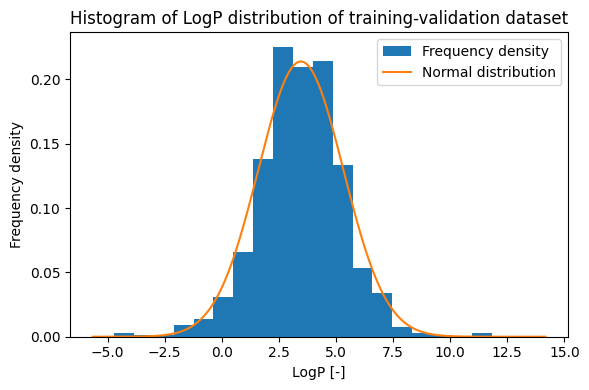

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.hist(train_df["LogP"].to_numpy(), bins=np.arange(train_min, train_max+step, step).tolist(), density=True, label="Frequency density")
plt.plot(X, P, label="Normal distribution")
plt.xlabel("LogP [-]")
plt.ylabel("Frequency density")
plt.title("Histogram of LogP distribution of training-validation dataset")
plt.tight_layout()
plt.legend()
plt.show()

# Test dataset distribution and Pearson correlation

In [6]:
with open("Notebook_result_1/analysis_df.pickle", "rb") as file:
    analysis_df = pickle.load(file)
analysis_df.head()

,SMILES,rdkit_Mol,SELFIES,LogP
0,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(O)(c2cc...,<rdkit.Chem.rdchem.Mol object at 0x00000252998...,[O][=C][Branch2][Ring1][Branch2][C][C][C][C][C...,4.78309
1,S=c1sc(SCCOc2ccccc2)nn1-c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x00000252998...,[S][=C][S][C][Branch1][=N][S][C][C][O][C][=C][...,4.83439
2,COC(=O)c1cc(C)nc2c1c(=O)nc(SCc1ccccc1F)n2C1CC1,<rdkit.Chem.rdchem.Mol object at 0x00000252998...,[C][O][C][=Branch1][C][=O][C][=C][C][Branch1][...,3.65282
3,CC(NC(Cc1ccc(-c2cccc(Cl)c2)cc1)C(=O)NC1=NNNN1C...,<rdkit.Chem.rdchem.Mol object at 0x00000252998...,[C][C][Branch2][Ring2][=Branch2][N][C][Branch2...,1.32260
4,O=C(O)c1cccc(CN=c2[nH][nH]c(=Nc3cc(Cl)cc(Cl)c3...,<rdkit.Chem.rdchem.Mol object at 0x00000252998...,[O][=C][Branch1][C][O][C][=C][C][=C][C][Branch...,3.00920


In [7]:
mean, std = np.mean(analysis_df["LogP"]), np.std(analysis_df["LogP"])
print(mean, std)

3.392550760000002 1.7150376015371287


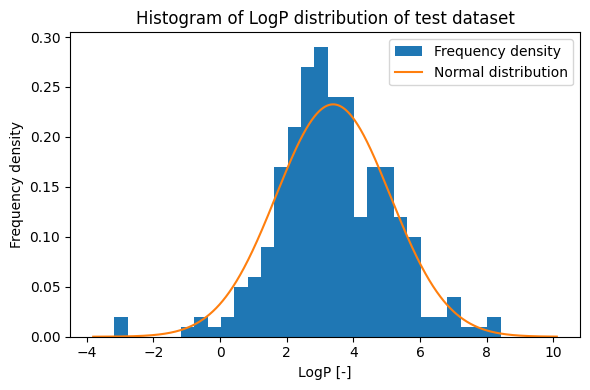

In [8]:
analysis_min, analysis_max= analysis_df["LogP"].min(), analysis_df["LogP"].max()
step = (analysis_max - analysis_min)/29
X = np.linspace(analysis_min*1.2,analysis_max*1.2,num=1000)
P = [function(x, std, mean) for x in X]

plt.figure(figsize=(6, 4))
plt.hist(analysis_df["LogP"].to_numpy(), bins=np.arange(analysis_min, analysis_max+step, step).tolist(), density=True, label="Frequency density")
plt.plot(X, P, label="Normal distribution")
plt.xlabel("LogP [-]")
plt.ylabel("Frequency density")
plt.title("Histogram of LogP distribution of test dataset")
plt.tight_layout()
plt.legend()
plt.show()

In [9]:
import torch
from model.gollum_LLM import LLMFeaturizer

encoder = LLMFeaturizer(
    model_name="T5-base",
    trainable=True,
    target_ratio=0.25,
    from_top=True,
    lora_dropout=0.2,
    modules_to_save=["head"],
    pooling_method="average",
    normalize_embeddings=False,
    projection_dim = 64,

    device = torch.device("cuda"),
    data_type = torch.float32,
)

LoRA_ckpt = torch.load("LoRA_only.pt", map_location=torch.device("cuda"))
projector_ckpt = torch.load("projection_only.pt", map_location=torch.device("cuda"))

encoder.projector.load_state_dict(projector_ckpt, strict=True)
encoder.llm.load_state_dict(LoRA_ckpt, strict=False)

encoder.eval()

T5-base for LLM
LLM using device: cuda

Found 18 linear layers (top 25.0% of 12 layers):
Layer numbers selected: [9, 10, 11]
trainable params: 165,888 || all params: 109,794,432 || trainable%: 0.1511


LLMFeaturizer(
  (llm): PeftModel(
    (base_model): LoraModel(
      (model): T5EncoderModel(
        (shared): Embedding(32128, 768)
        (encoder): T5Stack(
          (embed_tokens): Embedding(32128, 768)
          (block): ModuleList(
            (0): T5Block(
              (layer): ModuleList(
                (0): T5LayerSelfAttention(
                  (SelfAttention): T5Attention(
                    (q): Linear(in_features=768, out_features=768, bias=False)
                    (k): Linear(in_features=768, out_features=768, bias=False)
                    (v): Linear(in_features=768, out_features=768, bias=False)
                    (o): Linear(in_features=768, out_features=768, bias=False)
                    (relative_attention_bias): Embedding(32, 12)
                  )
                  (layer_norm): T5LayerNorm()
                  (dropout): Dropout(p=0, inplace=False)
                )
                (1): T5LayerFF(
                  (DenseReluDense): T5DenseActDense(

In [10]:
from util.gollum_util import make_template
from transformers import AutoTokenizer

prompts = [make_template(smi) for smi in analysis_df["SMILES"].tolist()]

tokenizer = AutoTokenizer.from_pretrained("t5-base", trust_remote_code=True)
tokenizer.pad_token = tokenizer.pad_token or tokenizer.eos_token

HF_MAX_LEN = 100

_token_ids = tokenizer(prompts, padding=False, truncation=False, add_special_tokens=True)["input_ids"]
_max_batch_len = max(len(ids) for ids in _token_ids)

tokenized_smiles = tokenizer(
    prompts,
    padding="max_length" if HF_MAX_LEN > _max_batch_len else "longest",
    truncation=True,
    max_length=HF_MAX_LEN,
    return_tensors="pt",
)

analysis_x_raw = torch.cat(
    [tokenized_smiles["input_ids"], tokenized_smiles["attention_mask"]], dim=1
)

analysis_x_raw = analysis_x_raw.to(torch.device("cuda"))

In [11]:
encoder.eval()
analysis_embeddings=encoder(analysis_x_raw).detach().cpu().numpy()
analysis_df["SMILES_embed"] = list(analysis_embeddings)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

smiless_embed = np.stack(analysis_df["SMILES_embed"].to_numpy())
scaled_embed = StandardScaler().fit_transform(smiless_embed)
pca = PCA(n_components=2, random_state=0)
Z = pca.fit_transform(scaled_embed)
analysis_df[["PC1", "PC2"]] = Z

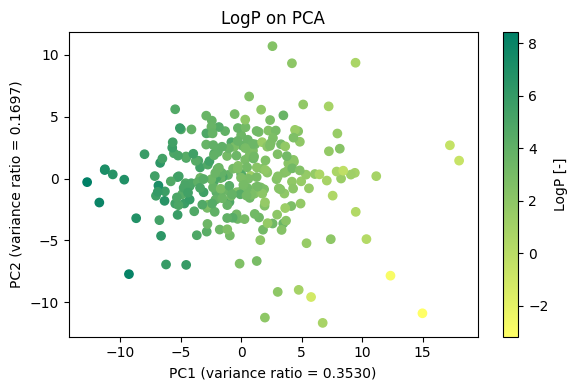

In [13]:
plt.figure(figsize=(6, 4))
plt.scatter(analysis_df["PC1"], analysis_df["PC2"], c=analysis_df["LogP"], cmap="summer_r")
plt.colorbar(label="LogP [-]")
plt.xlabel(f"PC1 (variance ratio = {pca.explained_variance_ratio_[0]:.4f})")
plt.ylabel(f"PC2 (variance ratio = {pca.explained_variance_ratio_[1]:.4f})")
plt.title("LogP on PCA")
plt.tight_layout()
plt.savefig("Notebook_result_1/LogP on PCA.png", bbox_inches="tight")
plt.show()

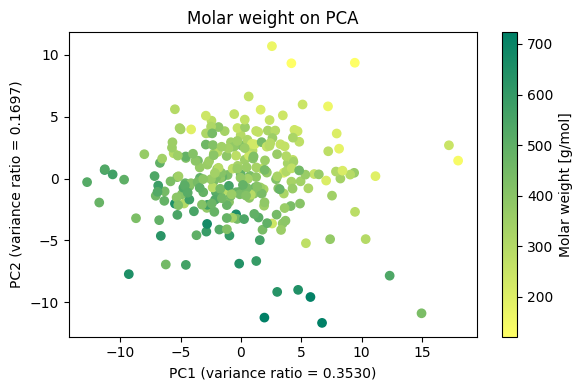

In [14]:
from rdkit.Chem import Descriptors
analysis_df["MolWt"] = [Descriptors.MolWt(s) for s in analysis_df["rdkit_Mol"]]
plt.figure(figsize=(6, 4))
plt.scatter(analysis_df["PC1"], analysis_df["PC2"], c=analysis_df["MolWt"], cmap="summer_r")
plt.colorbar(label="Molar weight [g/mol]")
plt.xlabel(f"PC1 (variance ratio = {pca.explained_variance_ratio_[0]:.4f})")
plt.ylabel(f"PC2 (variance ratio = {pca.explained_variance_ratio_[1]:.4f})")
plt.title("Molar weight on PCA")
plt.tight_layout()
plt.savefig("Notebook_result_1/MolWt on PCA.png", bbox_inches="tight")
plt.show()

In [15]:
analysis_df.head()

,SMILES,rdkit_Mol,SELFIES,LogP,SMILES_embed,PC1,PC2,MolWt
0,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(O)(c2cc...,<rdkit.Chem.rdchem.Mol object at 0x00000252998...,[O][=C][Branch2][Ring1][Branch2][C][C][C][C][C...,4.78309,"[-0.45809177, -0.4047931, 0.05658318, 0.281859...",-4.610636,-0.373320,486.037
1,S=c1sc(SCCOc2ccccc2)nn1-c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x00000252998...,[S][=C][S][C][Branch1][=N][S][C][C][O][C][=C][...,4.83439,"[-0.4293512, -0.38859367, 0.05206371, 0.269541...",-0.824698,2.941428,346.502
2,COC(=O)c1cc(C)nc2c1c(=O)nc(SCc1ccccc1F)n2C1CC1,<rdkit.Chem.rdchem.Mol object at 0x00000252998...,[C][O][C][=Branch1][C][=O][C][=C][C][Branch1][...,3.65282,"[-0.42263353, -0.37241632, 0.033384938, 0.2690...",-1.688716,-1.210492,399.447
3,CC(NC(Cc1ccc(-c2cccc(Cl)c2)cc1)C(=O)NC1=NNNN1C...,<rdkit.Chem.rdchem.Mol object at 0x00000252998...,[C][C][Branch2][Ring2][=Branch2][N][C][Branch2...,1.32260,"[-0.4071133, -0.38913253, 0.057396304, 0.27540...",0.757381,0.218942,430.896
4,O=C(O)c1cccc(CN=c2[nH][nH]c(=Nc3cc(Cl)cc(Cl)c3...,<rdkit.Chem.rdchem.Mol object at 0x00000252998...,[O][=C][Branch1][C][O][C][=C][C][=C][C][Branch...,3.00920,"[-0.39976835, -0.42955667, 0.02443359, 0.28470...",-2.819549,-2.367362,378.219


In [16]:
standardized_LogP = StandardScaler().fit_transform(analysis_df["LogP"].to_numpy().reshape(-1,1))
standardized_MolWt = StandardScaler().fit_transform(analysis_df["MolWt"].to_numpy().reshape(-1,1))

In [17]:
from scipy import stats
r_LogP_PC1 = stats.pearsonr(standardized_LogP, analysis_df["PC1"].to_numpy().reshape(-1,1))
r_LogP_PC2 = stats.pearsonr(standardized_LogP, analysis_df["PC2"].to_numpy().reshape(-1,1))
r_MolWt_PC1 = stats.pearsonr(standardized_MolWt, analysis_df["PC1"].to_numpy().reshape(-1,1))
r_MolWt_PC2 = stats.pearsonr(standardized_MolWt, analysis_df["PC2"].to_numpy().reshape(-1,1))

In [18]:
print(r_LogP_PC1)
print(r_LogP_PC2)
print(r_MolWt_PC1)
print(r_MolWt_PC2)

PearsonRResult(statistic=array([-0.92120879]), pvalue=array([1.16438287e-103]))
PearsonRResult(statistic=array([0.05231274]), pvalue=array([0.41019195]))
PearsonRResult(statistic=array([-0.41907336]), pvalue=array([4.7186965e-12]))
PearsonRResult(statistic=array([-0.69644226]), pvalue=array([1.31927115e-37]))


# BO result

In [19]:
with open("Notebook_result_1/BO_GP_objfunc.pickle", "rb") as file:
    bo_result = pickle.load(file)

true_list = bo_result["ture_list"]
print(true_list)

[tensor(4.6836, dtype=torch.float64), 5.57943138715156, 6.263394704138125, 7.113698020382749, 7.685389143664102, 8.199476401520162, 8.56123549629752, 8.56123549629752, 8.56636959268087, 8.792851956465206, 8.904718026874859, 8.904718026874859, 8.904718026874859, 8.904718026874859, 8.904718026874859, 8.904718026874859, 9.076472290618721, 9.076472290618721, 9.276936546236815, 9.276936546236815, 9.276936546236815, 9.276936546236815, 9.276936546236815, 9.276936546236815, 9.276936546236815, 9.276936546236815, 9.276936546236815, 9.409732526788826, 9.409732526788826, 9.669343948622803, 9.669343948622803, 9.669343948622803, 9.669343948622803, 9.669343948622803, 9.669343948622803, 9.669343948622803, 9.794657997102192, 9.877808301721107, 10.21791815158855, 10.21791815158855, 10.21791815158855, 10.21791815158855, 10.21791815158855, 10.21791815158855, 10.21791815158855, 10.21791815158855, 10.349786369333653, 10.349786369333653, 10.349786369333653, 10.349786369333653, 10.349786369333653]


# Cosine similarity of the Vec2Text decoder results

In [20]:
analysis_df.head()

,SMILES,rdkit_Mol,SELFIES,LogP,SMILES_embed,PC1,PC2,MolWt
0,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(O)(c2cc...,<rdkit.Chem.rdchem.Mol object at 0x00000252998...,[O][=C][Branch2][Ring1][Branch2][C][C][C][C][C...,4.78309,"[-0.45809177, -0.4047931, 0.05658318, 0.281859...",-4.610636,-0.373320,486.037
1,S=c1sc(SCCOc2ccccc2)nn1-c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x00000252998...,[S][=C][S][C][Branch1][=N][S][C][C][O][C][=C][...,4.83439,"[-0.4293512, -0.38859367, 0.05206371, 0.269541...",-0.824698,2.941428,346.502
2,COC(=O)c1cc(C)nc2c1c(=O)nc(SCc1ccccc1F)n2C1CC1,<rdkit.Chem.rdchem.Mol object at 0x00000252998...,[C][O][C][=Branch1][C][=O][C][=C][C][Branch1][...,3.65282,"[-0.42263353, -0.37241632, 0.033384938, 0.2690...",-1.688716,-1.210492,399.447
3,CC(NC(Cc1ccc(-c2cccc(Cl)c2)cc1)C(=O)NC1=NNNN1C...,<rdkit.Chem.rdchem.Mol object at 0x00000252998...,[C][C][Branch2][Ring2][=Branch2][N][C][Branch2...,1.32260,"[-0.4071133, -0.38913253, 0.057396304, 0.27540...",0.757381,0.218942,430.896
4,O=C(O)c1cccc(CN=c2[nH][nH]c(=Nc3cc(Cl)cc(Cl)c3...,<rdkit.Chem.rdchem.Mol object at 0x00000252998...,[O][=C][Branch1][C][O][C][=C][C][=C][C][Branch...,3.00920,"[-0.39976835, -0.42955667, 0.02443359, 0.28470...",-2.819549,-2.367362,378.219


In [21]:
X_analysis = np.stack(analysis_df["SMILES_embed"].to_numpy())
X = torch.from_numpy(X_analysis).to(device=torch.device("cuda"), dtype=torch.float32)

In [ ]:
from model.Vec2Text_decoder import Vec2Text
from transformers import T5ForConditionalGeneration

base_t5 = T5ForConditionalGeneration.from_pretrained("t5-small")
dropout = base_t5.config.dropout_rate
print("The default dropout_rate of the T5 small model is: ", dropout)

Vec2Text_param = {
    "EmbToSeq_hidden_dim": 64,     #in Vec2Text "vec2text/models/corrector_encoder.py" line 25-29.
    "dropout": dropout,                                         #from Vec2Text literature, "vec2text/models/corrector_encoder.py" line 45
    "num_repeat_tokens": 16,                                    #from Vec2Text literature, "vec2text/tests/test_corrector_trainer.py" variable "DEFAULT_ARGS_STR"
    "LoRA_target_proportion": 0.25,                             #similar to GOLLuM
    "LoRA_r": 4,                                                #similar to GOLLuM
    "LoRA_alpha": 16,                                           #similar to GOLLuM
    "batch_size": 128,                                          #arbitrary
    "lr": 0.0003,                                               #from Vec2Text literature, "vec2text/tests/test_corrector_trainer.py" in variable "DEFAULT_ARGS_STR"
    "weight_decay": 0.005                                       #arbitrary
}

The default dropout_rate of the T5 small model is:  0.1


In [23]:
import selfies
from selfies.utils.selfies_utils import len_selfies

all_characters = [selfies.split_selfies(s) for s in train_df["SELFIES"]]

pad_token = "[nop]"
eos_token = "[eos]"
bos_token = "[bos]"

unique_tokens = set(tok for seq in all_characters for tok in seq)

all_tokens = [pad_token, eos_token, bos_token] + sorted(unique_tokens)

vocab_key = {all_tokens[i]: i for i in range(len(all_tokens))}
int_key = {i: all_tokens[i] for i in range(len(all_tokens))}

selfies_count = np.array([len_selfies(s) for s in train_df["SELFIES"]])
pad_to_length = int(selfies_count.max())

labels_list = []
onehot_list = []
for s in train_df["SELFIES"]:
    labels, one_hot = selfies.selfies_to_encoding(
        s, vocab_key, enc_type="both", pad_to_len=pad_to_length
    )
    labels_list.append(np.asarray(labels, dtype=np.int64))
    onehot_list.append(np.asarray(one_hot, dtype=np.float32))

train_df["SELFIES_label"] = list(labels_list)
train_df["SELFIES_one_hot"] = list(onehot_list)

pad_id = vocab_key["[nop]"]
eos_id = vocab_key["[eos]"]
bos_id = vocab_key["[bos]"]
V = len(vocab_key)

In [24]:
Vec2Text_decoder = Vec2Text(
    latent_dim=64,
    EmbToSeq_hidden_dim=Vec2Text_param["EmbToSeq_hidden_dim"],
    EmbToSeq_dropout=Vec2Text_param["dropout"],
    num_repeat_tokens=Vec2Text_param["num_repeat_tokens"],
    LoRA_target_proportion=Vec2Text_param["LoRA_target_proportion"],
    LoRA_r=Vec2Text_param["LoRA_r"],
    LoRA_alpha=Vec2Text_param["LoRA_alpha"],
    LoRA_dropout=Vec2Text_param["dropout"],
    model_name="T5-base",
    trainable=True,
    target_ratio=0.25,
    from_top=True,
    lora_dropout=0.2,
    modules_to_save=["head"],
    pooling_method="average",
    normalize_embeddings=False,
    projection_dim = 64,
    LLMFeaturizer_LoRA_ckpt=LoRA_ckpt,
    LLMFeaturizer_projector_ckpt=projector_ckpt,
    pad_idx_data = pad_id,
    vocab_size = V,
    eos_idx_data = eos_id,
    bos_idx_data = bos_id,
    max_length=128,
    device = torch.device("cuda"),
    data_type = torch.float32,
)

ckpt = torch.load("Vec2Text_decoder_param.pt", map_location=torch.device("cuda"))
Vec2Text_decoder.load_state_dict(ckpt)


Found 32 linear layers (top 25.0% of 6 layers):
Layer numbers selected: [4, 5]
[LoRA] Using 12 q/v modules. Example(s): ['encoder.block.4.layer.0.SelfAttention.q', 'encoder.block.4.layer.0.SelfAttention.v', 'encoder.block.5.layer.0.SelfAttention.q', 'encoder.block.5.layer.0.SelfAttention.v', 'decoder.block.4.layer.0.SelfAttention.q', 'decoder.block.4.layer.0.SelfAttention.v']

Found 32 linear layers (top 25.0% of 6 layers):
Layer numbers selected: [4, 5]
[LoRA] Using 12 q/v modules. Example(s): ['encoder.block.4.layer.0.SelfAttention.q', 'encoder.block.4.layer.0.SelfAttention.v', 'encoder.block.5.layer.0.SelfAttention.q', 'encoder.block.5.layer.0.SelfAttention.v', 'decoder.block.4.layer.0.SelfAttention.q', 'decoder.block.4.layer.0.SelfAttention.v']
T5-base for LLM
LLM using device: cuda

Found 18 linear layers (top 25.0% of 12 layers):
Layer numbers selected: [9, 10, 11]
trainable params: 165,888 || all params: 109,794,432 || trainable%: 0.1511


<All keys matched successfully>

In [25]:
Vec2Text_decoder.eval()
with torch.no_grad():
    Vec2Text_recon = Vec2Text_decoder(max_loop=10, latent_emb=X, true_emb=X, early_stop_tol= 1e-3, patience=3)

In [26]:
attn = (Vec2Text_recon != pad_id).long()
final_emb = Vec2Text_decoder.embedder(torch.cat([Vec2Text_recon, attn], dim=1))
import torch.nn.functional as F
score = F.cosine_similarity(final_emb, X, dim=1)

print(score)
print(score.mean().item())

tensor([0.4734, 0.4850, 0.4742, 0.4931, 0.4745, 0.4620, 0.4737, 0.4949, 0.4695,
        0.4763, 0.4876, 0.1470, 0.4299, 0.4167, 0.4832, 0.4863, 0.4791, 0.4311,
        0.5050, 0.4900, 0.2256, 0.4653, 0.5047, 0.4426, 0.4591, 0.4882, 0.4871,
        0.4857, 0.2231, 0.4971, 0.4922, 0.5031, 0.4872, 0.4172, 0.5060, 0.4834,
        0.4827, 0.4673, 0.4844, 0.4858, 0.4754, 0.4265, 0.4826, 0.4120, 0.4146,
        0.4663, 0.4879, 0.4215, 0.4624, 0.4132, 0.5054, 0.4813, 0.5023, 0.4858,
        0.1687, 0.4866, 0.5041, 0.4941, 0.4876, 0.4797, 0.4872, 0.4815, 0.1817,
        0.5040, 0.4559, 0.4110, 0.5047, 0.4610, 0.4859, 0.5069, 0.4845, 0.4946,
        0.4917, 0.4828, 0.4177, 0.4297, 0.4947, 0.4532, 0.4978, 0.4786, 0.4801,
        0.4850, 0.4402, 0.4452, 0.4810, 0.4703, 0.4815, 0.4986, 0.4587, 0.4756,
        0.4614, 0.4662, 0.4786, 0.4901, 0.4095, 0.4819, 0.4875, 0.4752, 0.4781,
        0.4721, 0.4727, 0.4729, 0.4854, 0.4872, 0.4710, 0.4161, 0.4897, 0.2200,
        0.4993, 0.2167, 0.4404, 0.4593, 

# Replotting figure

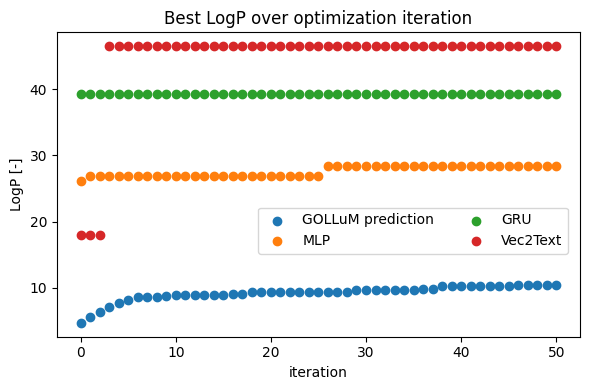

In [27]:
import pickle
import matplotlib.pyplot as plt
with open("Notebook_result_1/BO_GP_objfunc.pickle", "rb") as file:
    GP_objfunc = pickle.load(file)

ture_list = GP_objfunc["ture_list"]
MLP_list = GP_objfunc["MLP_list"]
GRU_list = GP_objfunc["GRU_list"]
V2T_list = GP_objfunc["V2T_list"]
iter_count = GP_objfunc["iter_count"]

plt.figure(figsize=(6, 4))
plt.scatter(iter_count, ture_list, label="GOLLuM prediction")
plt.scatter(iter_count, MLP_list, label="MLP")
plt.scatter(iter_count, GRU_list, label="GRU")
plt.scatter(iter_count, V2T_list, label="Vec2Text")
plt.legend(ncol=2, bbox_to_anchor = (0.99, 0.25),loc="lower right")
plt.xlabel("iteration")
plt.ylabel("LogP [-]")
plt.title("Best LogP over optimization iteration")
plt.tight_layout()
plt.show()

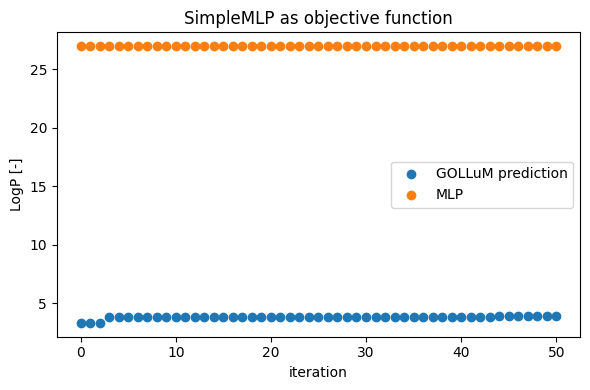

In [28]:
with open("Notebook_result_1/BO_MLP_objfunc.pickle", "rb") as file:
    MLP_objfunc = pickle.load(file)

true_list = MLP_objfunc["true_list"]
MLP_list = MLP_objfunc["MLP_list"]
iter_count = MLP_objfunc["iter_count"]

plt.figure(figsize=(6, 4))
plt.scatter(iter_count, true_list, label="GOLLuM prediction")
plt.scatter(iter_count, MLP_list, label="MLP")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("LogP [-]")
plt.title("SimpleMLP as objective function")
plt.tight_layout()
plt.show()

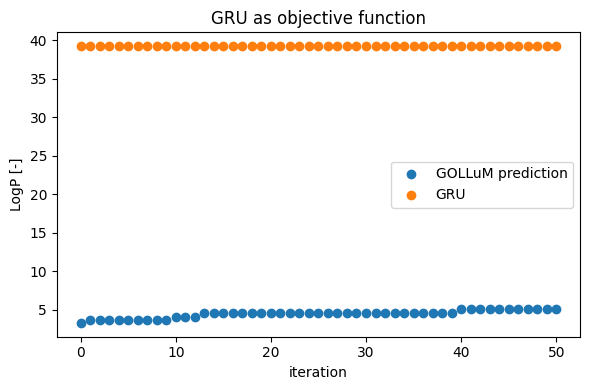

In [29]:
with open("Notebook_result_1/BO_GRU_objfunc.pickle", "rb") as file:
    GRU_objfunc=pickle.load(file)

true_list = GRU_objfunc["true_list"]
GRU_list = GRU_objfunc["GRU_list"]
iter_count = GRU_objfunc["iter_count"]

plt.figure(figsize=(6, 4))
plt.scatter(iter_count, true_list, label="GOLLuM prediction")
plt.scatter(iter_count, GRU_list, label="GRU")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("LogP [-]")
plt.title("GRU as objective function")
plt.tight_layout()
plt.show()

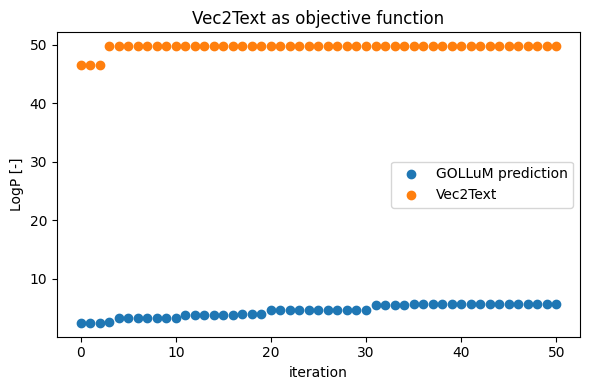

In [30]:
with open("Notebook_result_1/BO_Vec2Text_list_objfunc.pickle", "rb") as file:
    V2T_objfunc=pickle.load(file)

true_list = V2T_objfunc["true_list"]
Vec2Text_list = V2T_objfunc["Vec2Text_list"]
iter_count = V2T_objfunc["iter_count"]

plt.figure(figsize=(6, 4))
plt.scatter(iter_count, true_list, label="GOLLuM prediction")
plt.scatter(iter_count, Vec2Text_list, label="Vec2Text")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("LogP [-]")
plt.title("Vec2Text as objective function")
plt.tight_layout()
plt.show()

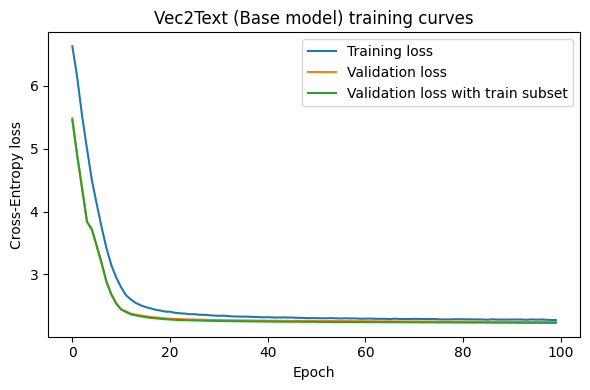

In [ ]:
with open("Notebook_result_1/Vec2Text_IH_train_result.pickle", "rb") as file:
    V2T_IH_train_result = pickle.load(file)

train_loss_per_epoch = V2T_IH_train_result["train_loss_per_epoch"]
val_loss_per_epoch = V2T_IH_train_result["val_loss_per_epoch"]
train_eval_loss_per_epoch = V2T_IH_train_result["train_eval_loss_per_epoch"]

plt.figure(figsize=(6, 4))
plt.plot(train_loss_per_epoch,    label="Training loss")
plt.plot(val_loss_per_epoch,     label="Validation loss")
plt.plot(train_eval_loss_per_epoch,     label="Validation loss with train subset")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy loss")
plt.title("Vec2Text (Base model) training curves")
plt.legend()
plt.tight_layout()
plt.show()